# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [39]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [31]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

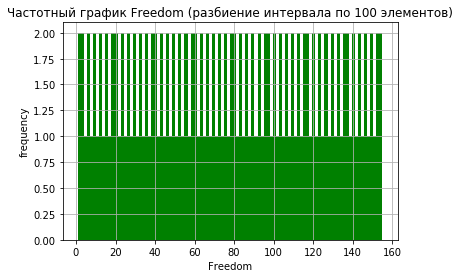

In [5]:
n, bins, patches = plt.hist(df['Freedom'], 100, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

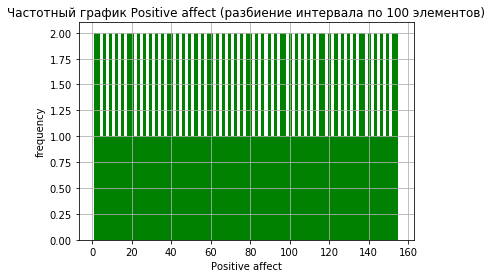

In [6]:
n, bins, patches = plt.hist(df['Positive affect'], 100, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# оба распределения равномерные

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [50]:
#  сбрасываем значение nan т.к. оно мешает произвести корректные расчеты
df.dropna(subset = ['Freedom'], inplace = True)

In [51]:
# среднее значение
# statistics.mean(df['Freedom'])
df['Freedom'].sum()/len(df['Freedom'])

78.0

In [52]:
# медиана
statistics.median(df['Freedom'])

78.0

In [53]:
# значения моды нет, т.к. все значения встречаются одинаковое количество раз
statistics.mode(df['Freedom'])

StatisticsError: no unique mode; found 155 equally common values

In [54]:
min(df['Freedom'])

1.0

In [55]:
max(df['Freedom'])

155.0

In [56]:
#  стандартное отклоенение
statistics.pstdev(df['Freedom'])

44.74371464239419

In [57]:
#  дисперсия
statistics.pvariance(df['Freedom'])

2002.0

In [58]:
#  на текущий момент отсутствующих значений нет, т.к. они были сброшены. В виду того, что мешали произвести расчеты
df['Freedom'].isnull().sum()

0

In [59]:
#  размах
freedom_range = max(df['Freedom']) - min(df['Freedom'])
print(freedom_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

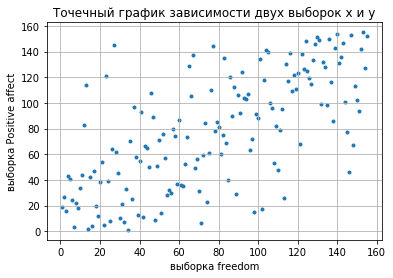

In [60]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [61]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601656


Знак коэффициента говорит о том, что чем он ближе к 1 тем переменные более зависимы.  Вданном случае есть небольшая положительная корреляция

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [62]:
print(statistics.mean(freedom))

78.0


In [63]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [64]:
min(freedom_1)

-77.0

In [65]:
max(freedom_1)

77.0

In [66]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

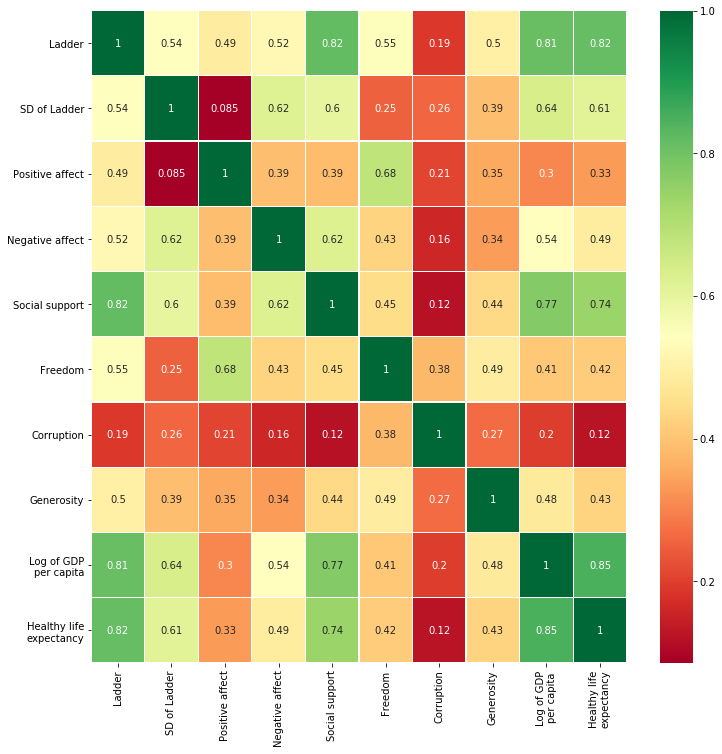

In [67]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [68]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

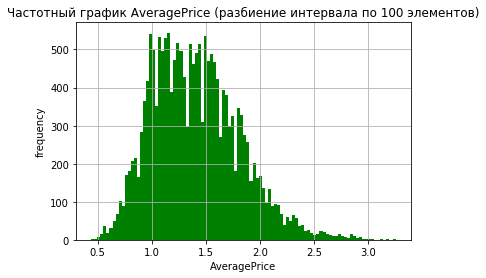

In [71]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# Это нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [74]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.20831704848788477


In [ ]:
#  есть незначительная отрицательная корреляция между данными параметрами. Можно сказать, что они независимы